**Imports**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

import numpy as np
import seaborn as sns

# 1. Cargar el dataset Fashion-MNIST

In [2]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Aplanar imágenes: 28x28 → 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convertir etiquetas a one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. Modelo base y variantes

## Modelo base (256 y 128 neuronas)

### Definir el modelo

In [3]:
model1 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Compilar el modelo y configurar el aprendizaje

In [4]:
model1.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy', Precision(), Recall()])

### Entrenar o ajustar (fit) el modelo

In [5]:
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 2s 1ms/step - loss: 0.4904 - accuracy: 0.8251 - precision: 0.8729 - recall: 0.7739
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3619 - accuracy: 0.8673 - precision: 0.8952 - recall: 0.8407
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3253 - accuracy: 0.8810 - precision: 0.9048 - recall: 0.8580
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.8882 - precision: 0.9089 - recall: 0.8688
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2829 - accuracy: 0.8947 - precision: 0.9140 - recall: 0.8766
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2703 - accuracy: 0.8980 - precision: 0.9165 - recall: 0.8820
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2571 - accuracy: 0.9034 - precision: 0.9201 - recall: 0.8881
Epoch 8/10
938/938 [=====================

## Modelo 2 (128 y 64 neuronas)

### Definir el modelo

In [6]:
model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Compilar el modelo y configurar el aprendizaje

In [7]:
model2.compile(optimizer=Adam(learning_rate=0.0008),
               loss='categorical_crossentropy',
               metrics=['accuracy', Precision(), Recall()])

### Entrenar o ajustar (fit) el modelo

In [8]:
history2 = model2.fit(x_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8234 - precision_1: 0.8727 - recall_1: 0.7680
Epoch 2/15
1875/1875 [==============================] - 2s 944us/step - loss: 0.3720 - accuracy: 0.8656 - precision_1: 0.8945 - recall_1: 0.8367
Epoch 3/15
1875/1875 [==============================] - 2s 991us/step - loss: 0.3343 - accuracy: 0.8773 - precision_1: 0.9030 - recall_1: 0.8539
Epoch 4/15
1875/1875 [==============================] - 2s 942us/step - loss: 0.3129 - accuracy: 0.8854 - precision_1: 0.9085 - recall_1: 0.8634
Epoch 5/15
1875/1875 [==============================] - 2s 995us/step - loss: 0.2947 - accuracy: 0.8920 - precision_1: 0.9121 - recall_1: 0.8726
Epoch 6/15
1875/1875 [==============================] - 2s 933us/step - loss: 0.2806 - accuracy: 0.8964 - precision_1: 0.9152 - recall_1: 0.8787
Epoch 7/15
1875/1875 [==============================] - 2s 995us/step - loss: 0.2666 - accuracy: 0.9013 - precision_1: 0.9192 - reca

## Modelo 3 (512, 256 y 128 neuronas)

### Definir el modelo

In [9]:
model3 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compilar el modelo y configurar el aprendizaje

In [10]:
model3.compile(optimizer=Adam(learning_rate=0.0005),
               loss='categorical_crossentropy',
               metrics=['accuracy', Precision(), Recall()])

### Entrenar o ajustar (fit) el modelo

In [11]:
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5140 - accuracy: 0.8183 - precision_2: 0.8759 - recall_2: 0.7564
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3608 - accuracy: 0.8695 - precision_2: 0.8981 - recall_2: 0.8402
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3189 - accuracy: 0.8826 - precision_2: 0.9063 - recall_2: 0.8596
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2947 - accuracy: 0.8918 - precision_2: 0.9134 - recall_2: 0.8718
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2749 - accuracy: 0.8978 - precision_2: 0.9158 - recall_2: 0.8803
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2596 - accuracy: 0.9015 - precision_2: 0.9197 - recall_2: 0.8859
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2484 - accuracy: 0.9067 - precision_2: 0.9233 - recall_2: 0.8921
Epoch 8/20
46

# 3. Evaluación

**Función F1-Score**

In [12]:
def f1_score(recall, precision):
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

313/313 [==============================] - 1s 4ms/step - loss: 0.3580 - accuracy: 0.8934 - precision_2: 0.9045 - recall_2: 0.8872
F1-Scores:
Modelo 1 - 0.8903303846662579
Modelo 2 - 0.8876809279068681
Modelo 3 - 0.8957544179182184
313/313 [==============================] - 1s 4ms/step


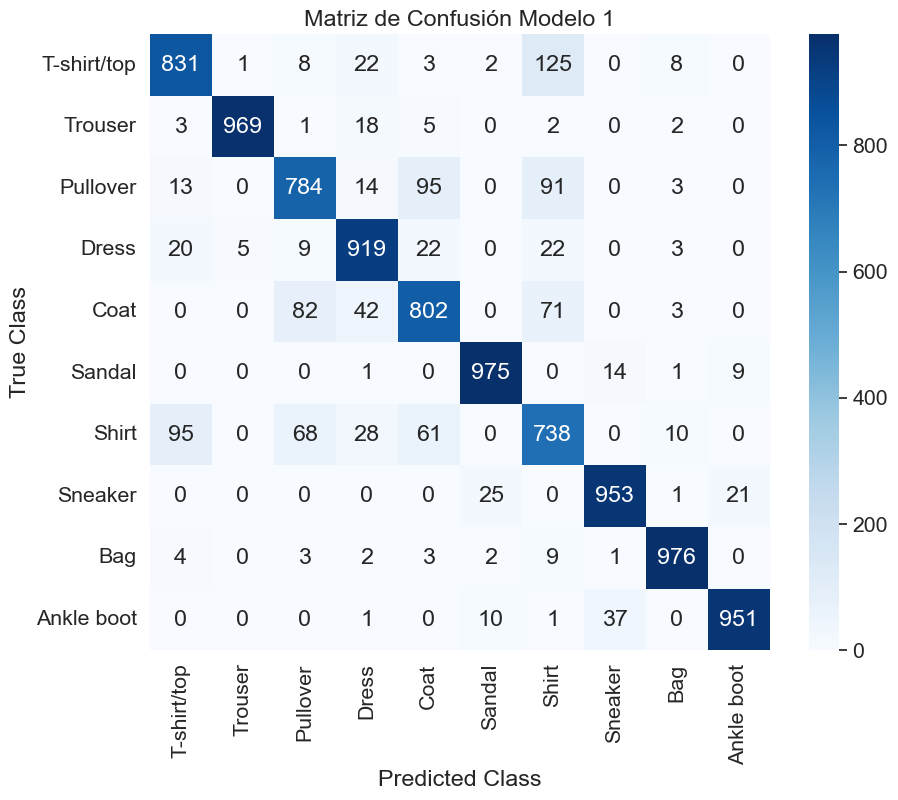

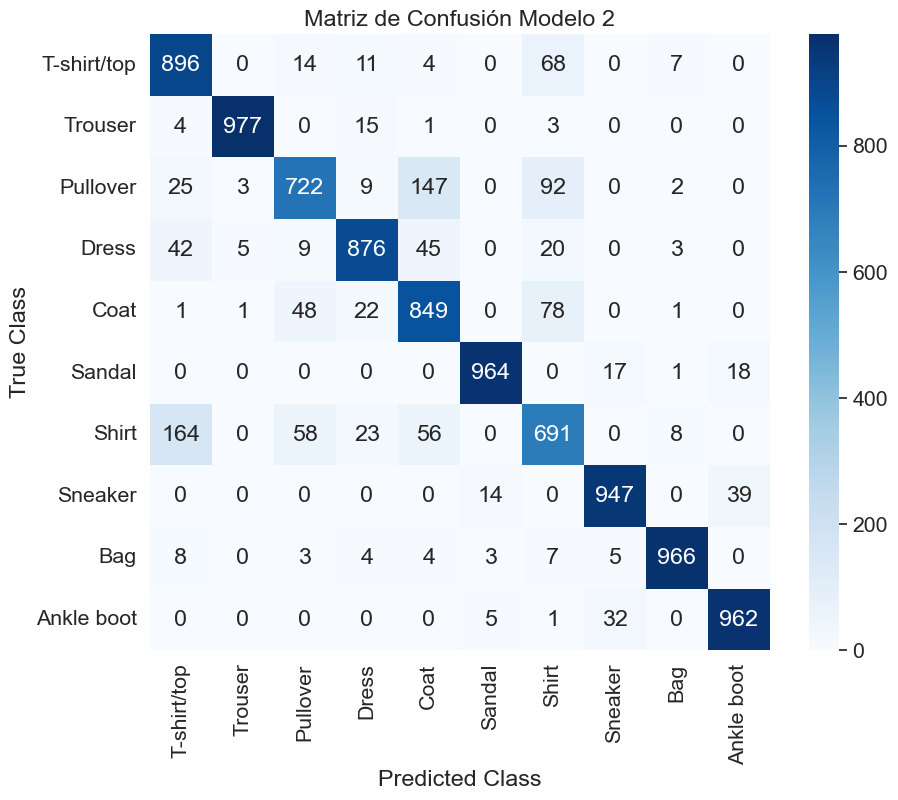

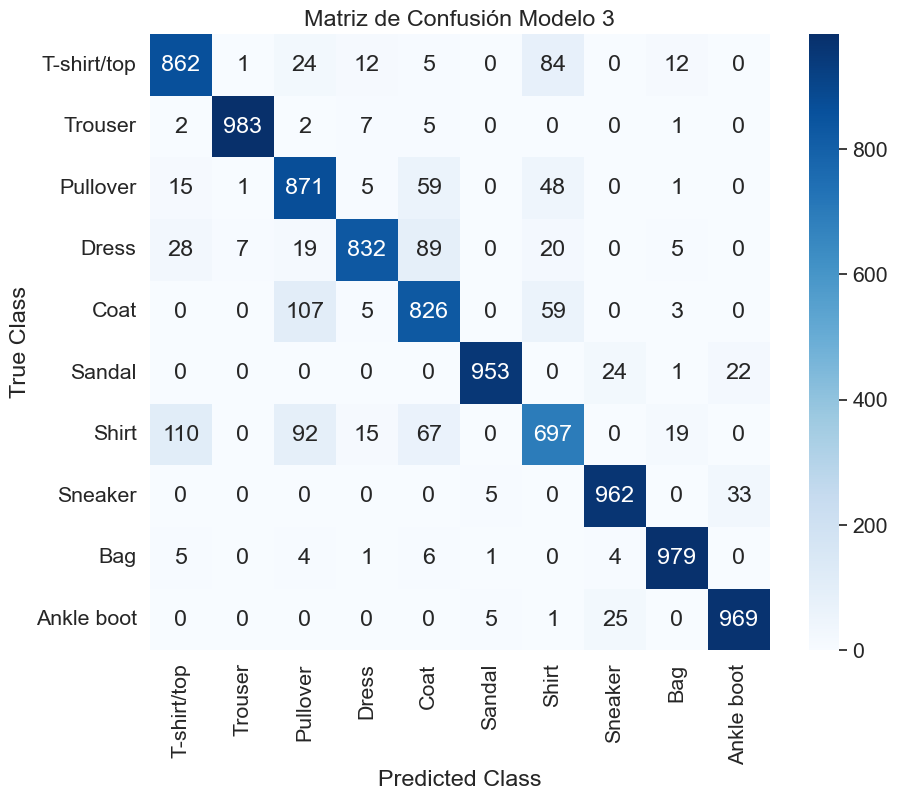

In [15]:
test_loss1, test_acc1, test_prec1, test_rec1 = model1.evaluate(x_test, y_test)
test_f1score1 = f1_score(test_rec1, test_prec1)

test_loss2, test_acc2, test_prec2, test_rec2 = model2.evaluate(x_test, y_test)
test_f1score2 = f1_score(test_rec2, test_prec2)

test_loss3, test_acc3, test_prec3, test_rec3 = model3.evaluate(x_test, y_test)
test_f1score3 = f1_score(test_rec3, test_prec3)

print("F1-Scores:")
print(f"Modelo 1 - {test_f1score1}")
print(f"Modelo 2 - {test_f1score2}")
print(f"Modelo 3 - {test_f1score3}")

predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)

# Obtener las clases predichas
predicted_classes1 = np.argmax(predictions1, axis=1)
predicted_classes2 = np.argmax(predictions2, axis=1)
predicted_classes3 = np.argmax(predictions3, axis=1)

true_classes = np.argmax(y_test, axis=1)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Graficar la matriz de confusión 1
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Aumentar el tamaño de la fuente para la matriz de confusión
sns.heatmap(confusion_matrix(true_classes, predicted_classes1), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión Modelo 1')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Graficar la matriz de confusión 2
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Aumentar el tamaño de la fuente para la matriz de confusión
sns.heatmap(confusion_matrix(true_classes, predicted_classes2), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión Modelo 2')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Graficar la matriz de confusión 3
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Aumentar el tamaño de la fuente para la matriz de confusión
sns.heatmap(confusion_matrix(true_classes, predicted_classes3), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión Modelo 3')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# 4. Usar el modelo

Valor más alto (mayor probabilidad) para el elemento 11:
Modelo 1 predice la clase: Trouser
Modelo 2 predice la clase: Trouser
Modelo 3 predice la clase: Trouser

Etiqueta real:
Trouser

Array de probabilidades del modelo 1: [2.2585251e-08 9.9999976e-01 4.0623012e-09 1.5961160e-07 7.6444280e-08
 3.6201741e-14 1.7369608e-08 4.5202490e-16 1.5596847e-09 4.3574949e-14]
Array de probabilidades del modelo 2: [8.9221217e-09 9.9999881e-01 1.8398313e-10 3.9898239e-07 7.2018167e-08
 5.7282022e-12 1.9170863e-09 2.3691745e-12 7.0435294e-07 2.2305302e-11]
Array de probabilidades del modelo 3: [1.2134601e-11 1.0000000e+00 9.4589338e-15 1.0311534e-11 1.1043018e-10
 7.8833356e-14 2.4762140e-11 4.2743678e-16 1.9776515e-14 9.5317924e-19]


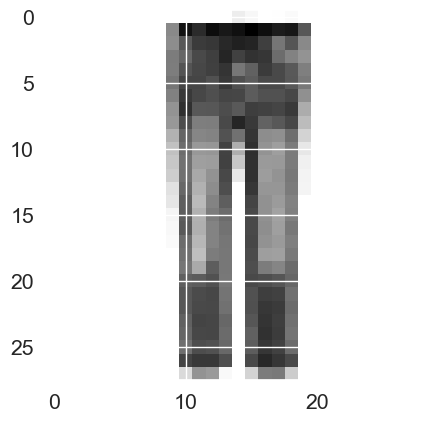

In [14]:
plt.imshow(x_test[15].reshape(28, 28), cmap=plt.cm.binary)

print("Valor más alto (mayor probabilidad) para el elemento 11:")
print(f"Modelo 1 predice la clase: {class_labels[np.argmax(predictions1[15])]}")
print(f"Modelo 2 predice la clase: {class_labels[np.argmax(predictions2[15])]}")
print(f"Modelo 3 predice la clase: {class_labels[np.argmax(predictions3[15])]}\n")

print("Etiqueta real:")
print(f"{class_labels[np.argmax(y_test[15])]}\n")

print(f"Array de probabilidades del modelo 1: {predictions1[15]}")
print(f"Array de probabilidades del modelo 2: {predictions2[15]}")
print(f"Array de probabilidades del modelo 3: {predictions3[15]}")